In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data_path = [
    'cifar10_FedAvg_64_10_0.01_0.01_5c_600r.h5',
    'cifar10_FedBN_64_10_0.01_0.05_5c_600r.h5',
    'cifar10_PerAvg_64_10_0.01_0.005_5c_600r.h5',
    'cifar10_pFedInit_64_10_0.01_0.005_5c_600r.h5'
]
# label = ['FedAvg', 'Per-FedAvg(0.01)', 'Per-FedAvg(0.005)', 'pFedInit']
label = ['FedAvg', 'FedBN', 'Per-FedAvg', 'pFedInit']

colors = ['#1B1A17', '#0F4C75', '#E45826', '#B33030']

markers = ['x', 'D', 'o', 'P']

0.010810636769654968
0.00030618027939717155
0.010954397362820134
-0.009691952459296802


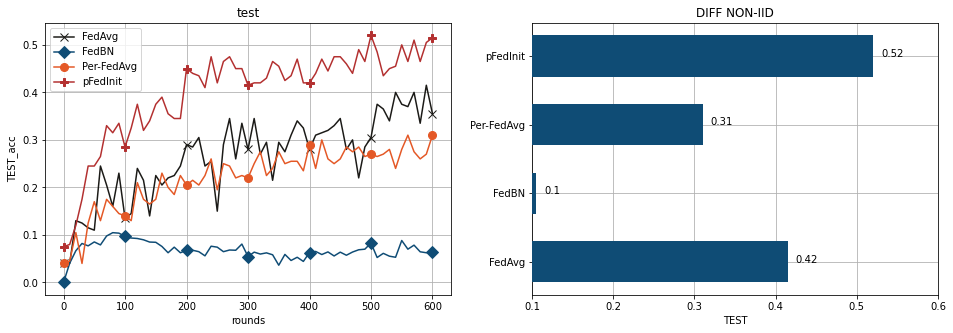

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))


max_testacc = []

for path, lab, col, mk in zip(data_path, label, colors, markers):
    data = h5py.File(path, 'r')
    losses = data['rs_train_loss'][::]
    train_acc = data['rs_train_acc'][::]
    test_acc = data['rs_glob_acc'][::]

    print(np.mean(train_acc-test_acc))
    max_testacc.append(np.max(test_acc))
    
    x = [i*10 for i in range(len(losses+1))]

    ax1.plot(x, test_acc, label = lab, color=col, marker=mk, markevery=10, markersize=8)


ax1.set_xlabel("rounds")
ax1.set_ylabel("TEST_acc")
ax1.set_title('test')

ax2.set_xlim(0.1, 0.6)
ax2.barh(range(len(data_path)), max_testacc, height=0.6, color='#0F4C75', zorder=10)
ax2.set_yticks(range(len(data_path)), label)
ax2.set_xlabel("TEST")
ax2.set_title("DIFF NON-IID")

for x, y in enumerate(max_testacc):
    ax2.text(y + 0.01, x-0.01, '%s' % (np.round(y, decimals=2)))


ax1.grid()
ax1.legend()
ax2.grid(zorder=0)
plt.savefig('femnist_acc_few_comp.pdf', dpi=600, pad_inches = 0)